# Recurrent Neural Networks with Keras

### Introduction
A RNN layer uses a `for` loop to iterate over the timesteps of a sequence, while maintaining an internal state that encodes information about the timestes it has seen so far.

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds

## Dataset

In [2]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True,
                         as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [3]:
encoder = info.features['text'].encoder
print('Vocabulary size: {}'.format(encoder.vocab_size))

Vocabulary size: 8185


In [4]:
sample_string = 'Hello TensorFlow.'

encoded_string = encoder.encode(sample_string)
print('Encoded string is {}'.format(encoded_string))

original_string = encoder.decode(encoded_string)
print('The original string: "{}"'.format(original_string))

Encoded string is [4025, 222, 6307, 2327, 4043, 2120, 7975]
The original string: "Hello TensorFlow."


In [5]:
assert original_string == sample_string
for index in encoded_string:
    print('{} ----> {}'.format(index, encoder.decode([index])))

4025 ----> Hell
222 ----> o 
6307 ----> Ten
2327 ----> sor
4043 ----> Fl
2120 ----> ow
7975 ----> .


In [6]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [7]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE)

test_dataset = test_dataset.padded_batch(BATCH_SIZE)

## Model

In [8]:
model = keras.Sequential([
    layers.Embedding(encoder.vocab_size, 64),
    layers.Bidirectional(layers.LSTM(64)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


## Training

In [9]:
EPOCHS = 10
VALIDAITON_STEPS = 30

In [10]:
model.compile(loss=keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [11]:
history = model.fit(train_dataset, epochs=EPOCHS,
                   validation_data=test_dataset,
                   validation_steps=VALIDAITON_STEPS)

Epoch 1/10
391/391 [==============================] - 262s 671ms/step - loss: 0.6578 - accuracy: 0.5443 - val_loss: 0.4998 - val_accuracy: 0.7656
Epoch 2/10
391/391 [==============================] - 255s 653ms/step - loss: 0.3537 - accuracy: 0.8508 - val_loss: 0.3794 - val_accuracy: 0.8281
Epoch 3/10
391/391 [==============================] - 250s 639ms/step - loss: 0.2550 - accuracy: 0.9009 - val_loss: 0.3338 - val_accuracy: 0.8620
Epoch 4/10
391/391 [==============================] - 246s 629ms/step - loss: 0.2099 - accuracy: 0.9220 - val_loss: 0.3419 - val_accuracy: 0.8708
Epoch 5/10
391/391 [==============================] - 256s 655ms/step - loss: 0.2019 - accuracy: 0.9246 - val_loss: 0.3969 - val_accuracy: 0.8411
Epoch 6/10
391/391 [==============================] - 252s 645ms/step - loss: 0.1669 - accuracy: 0.9424 - val_loss: 0.3533 - val_accuracy: 0.8687
Epoch 7/10
391/391 [==============================] - 248s 633ms/step - loss: 0.1438 - accuracy: 0.9508 - val_loss: 0.3729 -

## Evaluate

In [12]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

391/391 [==============================] - 65s 167ms/step - loss: 0.4537 - accuracy: 0.8559
Test Loss: 0.4537159502506256
Test Accuracy: 0.8559200167655945


In [13]:
#Helper function
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])
    plt.show()

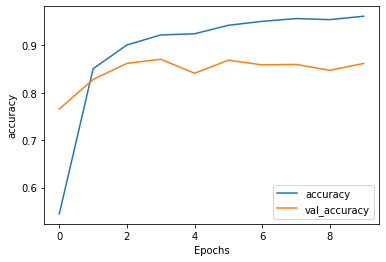

In [14]:
plot_graphs(history, 'accuracy')